# K-Means Clustering

## Basics of k-means clustering

K means runs significantly faster on large datasets. K-means returns two arguments, the cluster centers and distortion. with vq these cluster centers are turned into cluster labels.

### K-means clustering: first exercise

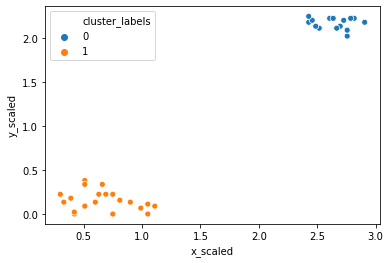

In [4]:
import pandas as pd
from scipy.cluster.vq import kmeans, vq
import seaborn as sns
import matplotlib.pyplot as plt
comic_con = pd.read_csv("comic_con.csv", index_col=0)

cluster_centers, distortion = kmeans(comic_con[["x_scaled", "y_scaled"]], 2)
comic_con["cluster_labels"], distortion_list = vq(comic_con[["x_scaled", "y_scaled"]], cluster_centers)
sns.scatterplot(x="x_scaled", y="y_scaled", hue="cluster_labels",data=comic_con)
plt.show()

### Runtime of k-means clustering

In [22]:
from scipy.cluster.vq import whiten
fifa = pd.read_csv("fifa_18_dataset.csv")
fifa = fifa[0:5000]
fifa["scaled_sliding_tackle"] = whiten(fifa["sliding_tackle"]).round(2)
fifa["scaled_aggression"] = whiten(fifa["aggression"]).round(2)
%timeit kmeans(fifa[["sliding_tackle", "scaled_aggression"]], 3)

96.6 ms ± 4.39 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## How many clusters?

No absolute method to find right number of clusters in kmeans but elbow methos is an indicative method.

Distortion is the sum of the squares of distances between each data point and its cluster center. Distortion decreases with increasing number of clusters. Becomes zero when the number of clusters equals the number of points. This is the underlying logic of the elbow method: line plot between cluster centers and distortion.

The elbow method only gives an indication of ideal number of clusters. Occasionally it can be insufficient to find an optimal number of clusters (if the data evenly distributed). There are other methods such as **average silhoutte** and **gap statistic** methods.

### Elbow method on distinct clusters

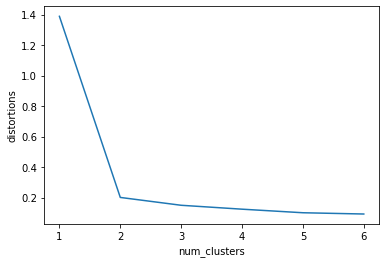

In [25]:
distortions = []
num_clusters = range(1, 7)
for i in num_clusters:
    cluster_centers, distortion = kmeans(comic_con[["x_scaled", "y_scaled"]], i)
    distortions.append(distortion)
    
elbow_plot = pd.DataFrame({"num_clusters":num_clusters, "distortions":distortions})
sns.lineplot(x="num_clusters", y="distortions", data=elbow_plot)
plt.xticks(num_clusters)
plt.show()

There are 2 clusters.

### Elbow method on uniform data

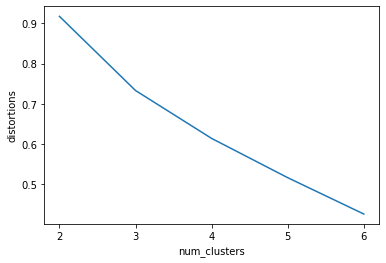

In [42]:
uniform_data = pd.read_csv("uniform_data.csv", index_col=0)

distortions = []
num_clusters = range(2, 7)
for i in num_clusters:
    cluster_centers, distortion = kmeans(uniform_data[["x_scaled", "y_scaled"]], i)
    distortions.append(distortion)
    
elbow_plot = pd.DataFrame({"num_clusters":num_clusters, "distortions":distortions})
sns.lineplot(x="num_clusters", y="distortions", data=elbow_plot)
plt.xticks(num_clusters)
plt.show()

There is no well defined elbow in this plot

## Limitations of k-means clustering

Finding the right K, impact of seed and biased towards equal sized clusters.

Consider you data size and patterns before deciding on algorithm. Clustering is exploratory phase of analysis.

### Impact of seeds on distinct clusters


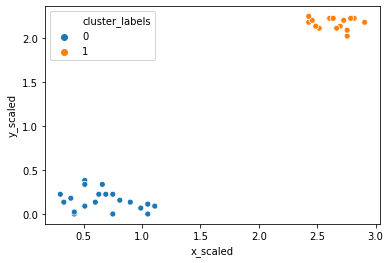

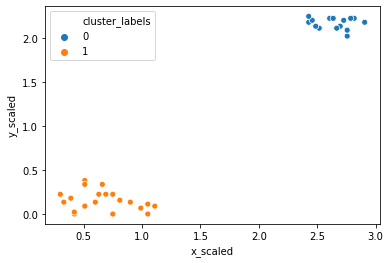

In [67]:
from numpy import random
random.seed(0)
cluster_centers, distortion = kmeans(comic_con[["x_scaled", "y_scaled"]], 2)
comic_con["cluster_labels"], distortion_list = vq(comic_con[["x_scaled", "y_scaled"]], cluster_centers)
sns.scatterplot(x="x_scaled", y="y_scaled", hue="cluster_labels",data=comic_con)
plt.show()

random.seed([1, 2, 1000])
cluster_centers, distortion = kmeans(comic_con[["x_scaled", "y_scaled"]], 2)
comic_con["cluster_labels"], distortion_list = vq(comic_con[["x_scaled", "y_scaled"]], cluster_centers)
sns.scatterplot(x="x_scaled", y="y_scaled", hue="cluster_labels",data=comic_con)
plt.show()

### Uniform clustering patterns

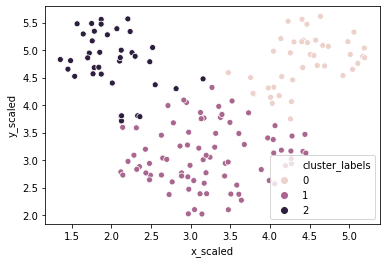

In [74]:
mouse = pd.read_csv("mouse.csv", index_col=0)
cluster_centers, distortion = kmeans(mouse[["x_scaled", "y_scaled"]], 3)
mouse["cluster_labels"], distortion_list = vq(mouse[["x_scaled", "y_scaled"]], cluster_centers)
sns.scatterplot(x="x_scaled", y="y_scaled", hue="cluster_labels",data=mouse)
plt.legend(loc = "lower right")
plt.show()

K-means is unable to capture the three visible clusters clearly, and the two clusters towards the top have taken in some points along the boundary. This happens due to the underlying assumption in kmeans algorithm to minimize distortions which leads to clusters that are similar in terms of area.

### FIFA 18: defenders revisited

                scaled_def  scaled_phy
cluster_labels                        
0                 1.948298    7.163234
1                 3.817844    9.020452
2                 2.072803    9.066327


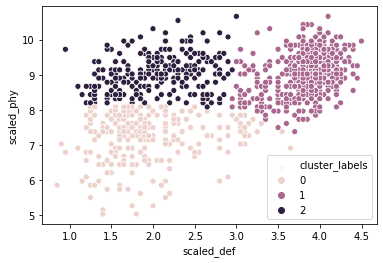

In [95]:
fifa = pd.read_csv("fifa_18_sample_data.csv")
fifa[0:250]
random.seed([1000, 2000])
fifa["scaled_def"] = whiten(fifa["def"])
fifa["scaled_phy"] = whiten(fifa["phy"])

cluster_centers, _ = kmeans(fifa[["scaled_def", "scaled_phy"]], 3)
fifa["cluster_labels"], _ = vq(fifa[["scaled_def", "scaled_phy"]], cluster_centers)
print(fifa[['scaled_def', 'scaled_phy', 'cluster_labels']].groupby("cluster_labels").mean())

sns.scatterplot(x="scaled_def", y="scaled_phy", hue="cluster_labels", data=fifa)
plt.show()

The seed has an impact on clustering as the data is uniformly distributed.